In [51]:
import numpy as np

In [52]:
# load the mnist dataset

def fetch(url):
  import requests, gzip, os, hashlib, numpy
  fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
  if os.path.isfile(fp):
    with open(fp, "rb") as f:
      dat = f.read()
  else:
    with open(fp, "wb") as f:
      dat = requests.get(url).content
      f.write(dat)
  return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()
X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [53]:
from torch import nn

class MnistNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(28*28, 128)
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(128, 10)
        self.act2 = nn.LogSoftmax()
    
    def forward(self, x):
        x = self.l1(x)
        x = self.act1(x)
        x = self.l2(x)
        x = self.act2(x)
        return x



/tmp/ipykernel_59520/3090005583.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.act2(x)


guess: tensor([[ -1.7680, -21.0725,  -7.3582,  -2.6987, -45.3488, -36.8402, -53.8379,
         -49.0826,  -0.2726, -15.7829]], grad_fn=<LogSoftmaxBackward0>), target: 5
guess: tensor([[-1.8525e+01, -8.4612e+00, -2.7267e+00, -6.7898e-02, -9.5933e+01,
         -5.3261e+01, -3.8913e+01, -4.4904e+01, -6.8154e+01, -1.4999e+01]],
       grad_fn=<LogSoftmaxBackward0>), target: 5
guess: tensor([[-5.8629e+01, -1.1516e+01, -4.2798e+00, -1.3953e-02, -7.0483e+01,
         -4.0376e+01, -4.2610e+01, -2.9315e+01, -5.5831e+01, -2.1333e+01]],
       grad_fn=<LogSoftmaxBackward0>), target: 1
guess: tensor([[-41.9493,   0.0000, -17.6105, -51.9817, -30.7625, -29.1623, -28.7072,
         -35.2209, -67.3560, -25.3455]], grad_fn=<LogSoftmaxBackward0>), target: 8
guess: tensor([[-5.7594e+01, -2.5001e+01, -1.9930e-04, -7.4714e+01, -4.9880e+01,
         -3.5493e+01, -4.9994e+01, -5.0516e+01, -9.6077e+01, -8.5211e+00]],
       grad_fn=<LogSoftmaxBackward0>), target: 3
guess: tensor([[-2.6709e+01, -2.4109e+01, -1

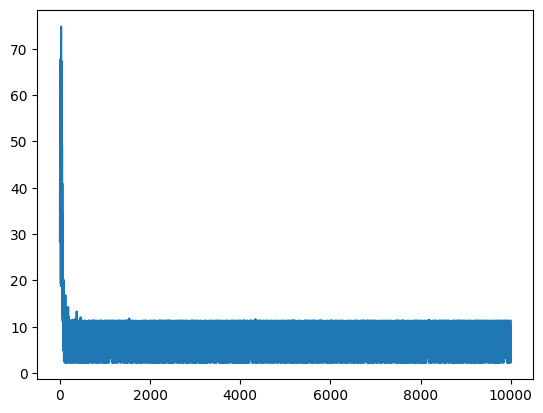

In [56]:
import torch
import math
import random
import matplotlib.pyplot as plt

model = MnistNet()

# train
loss_function = nn.L1Loss()
optim = torch.optim.Adam(model.parameters(), lr=0.001)
loses = []
for i in range(10000):
    samp = math.floor(random.random()*len(X_train))
    inpt = torch.tensor(X_train[samp].reshape((-1, 28*28))).float()
    target = torch.tensor(Y_train[samp]).long()
    optim.zero_grad()
    guess = model(inpt)
    #print(f"guess: {guess}, target: {target}")
    loss = loss_function(guess, target)
    loss.backward()
    optim.step()
    loses.append(loss.item())
plt.plot(loses)